# Classification 

*By: Zohoor Almalki*

*ID: 44680217.*

**GitHub:** https://github.com/ZohoorAlmalkiUQU/Machine-_Learning_HWs/blob/main/446_ML_ClassificationAssignmen.ipynb

## Introduction: $_{[3]}$
The insurer needs access to previous data to estimate each user's medical expenses in order to create the best medical insurance packages.  A medical insurer can use this information to plan a specific insurance outcome, manage large portfolios, or create more accurate pricing models.  Accurately estimating insurance costs is the goal in each of these situations.


## Dataset: $_{[3,2]}$
1,339 medical insurance records are included in this dataset.  The **target** variable **charges** are the individual medical expenses that are invoiced by health insurance; the remaining columns include personal data, like age, gender, family status, and if the patient smokes, among other characteristics.

**Columns**
- `age`: age of primary beneficiary
- `sex`: insurance contractor gender, female, male
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoking
- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges`: Individual medical costs billed by health insurance => This is my target.

In [5]:
import pandas as pd
import numpy as np

In [6]:
insurance=pd.read_csv('./Dataset/insurance.csv')

---
Next will show the first 5 samples in the dataset

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
Show the last 5 samples in the dataset

In [10]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


---
the dataset have a `1338 sample` each sample have a `7 features`.

In [12]:
insurance.shape

(1338, 7)

---
We have to check if our dataset have a `null` values.

In [14]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no `null` values so we will not drop a column

---

Now we will describe the dataset

In [17]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


----
We will observe here the data type for each feature; and each non numeric values we have to encode it into a numeric form to be understandable for our model.

In [19]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

---
`pd.get_dummies()` is a Pandas function used to convert categorical variables into dummy/indicator variables (also known as one-hot encoding).

It creates new binary columns for each category (e.g., `sex_male`, `smoker_yes`, `region_northwest`, etc.).

`columns=catColumns` tells it to apply this transformation only to the `sex`, `smoker`, and `region` columns.

`drop_first=True` avoids the dummy variable trap (multicollinearity in regression) by dropping the first category of each column. For example:

Instead of creating both `sex_female` and `sex_male`, it might only create `sex_male`. If `sex_male` is 0, it means the person is female.

Similarly, it drops the first value for each categorical column.

region has four categories: `southeast`, `southwest`, `northwest`, and `northeast`. So `get_dummies()` creates one column for each category

In [22]:
catColumns = ['sex', 'smoker', 'region']
insurance_dum = pd.get_dummies(insurance, columns = catColumns, drop_first=True)
insurance_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


----
### Data visualization $_{[1]}$

----

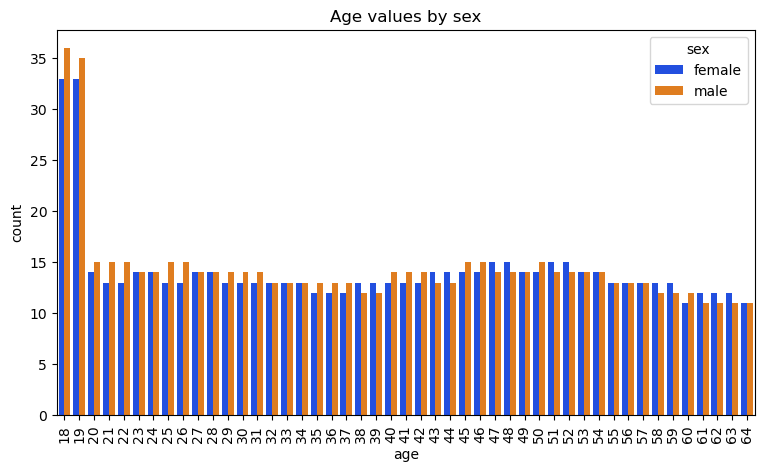

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('bright')
plt.figure(figsize=(9,5))
sns.countplot(x='age',hue='sex' ,data=insurance)
plt.title('Age values by sex')
plt.xticks(rotation=90)
plt.show()

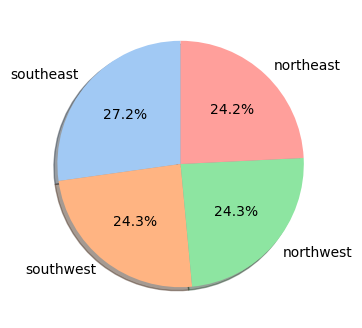

In [26]:
region=insurance['region'].value_counts()

labels=region.index
sizes=region.values
plt.figure(figsize=(6,4))
colors=sns.color_palette('pastel')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

---

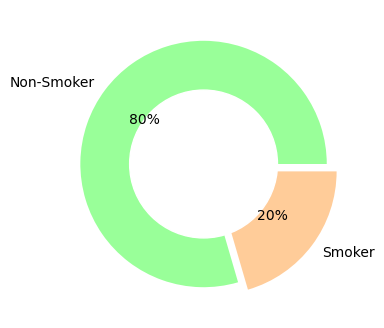

In [28]:
plt.figure(figsize=(6,4))
labels=['Non-Smoker','Smoker']
size=insurance['smoker'].value_counts()
colors=['#99ff99','#ffcc99']
explode=(0,0.1)
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%2.f%%')
circle = plt.Circle( (0,0),0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

---

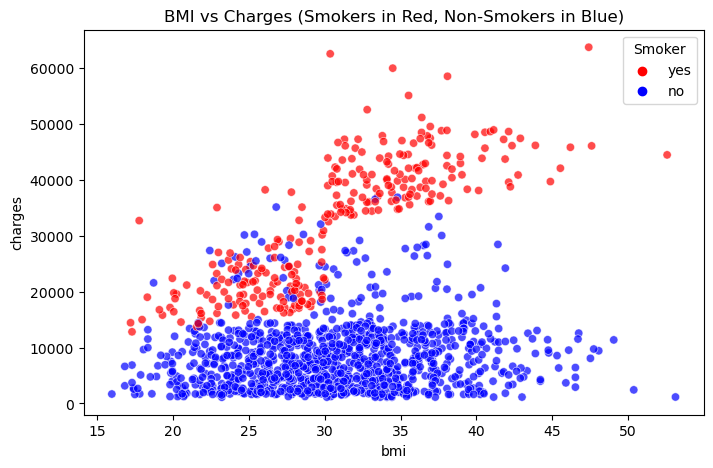

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a scatter plot with color based on 'smoker'
sns.scatterplot(
    x='bmi', 
    y='charges', 
    hue='smoker',  # Color points by smoker status
    palette={'yes': 'red', 'no': 'blue'},  # Map 'yes' to red, 'no' to blue
    data=insurance,
    alpha=0.7  # Slightly transparent for better visibility
)

# Add title and adjust legend
plt.title('BMI vs Charges (Smokers in Red, Non-Smokers in Blue)')
plt.legend(title='Smoker')  # Show legend with title

plt.show()

---
### find outliers

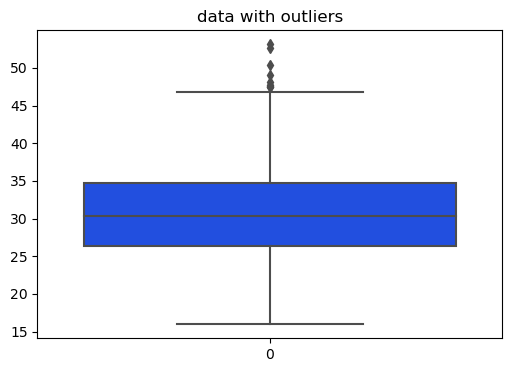

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(insurance['bmi'])
plt.title('data with outliers')
plt.show()

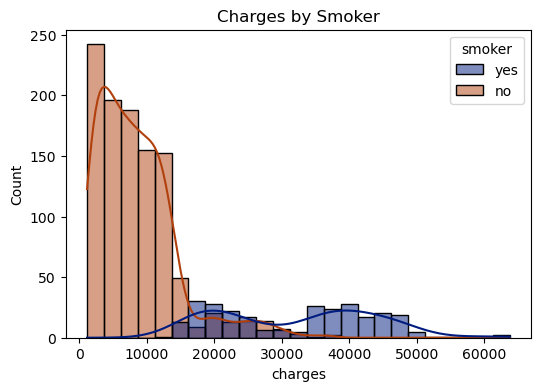

In [33]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data anyway (always good practice)
insurance_clean = insurance.replace([np.inf, -np.inf], np.nan).dropna(subset=['charges'])

# Suppress specific FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    
    fig, ax1 = plt.subplots(figsize=(6, 4))
    sns.set_palette('dark')
    sns.histplot(data=insurance_clean, x='charges', ax=ax1, bins=25, hue='smoker', kde=True)
    plt.title('Charges by Smoker')
    plt.show()


---
### Correlation Heatmap for Selected Features

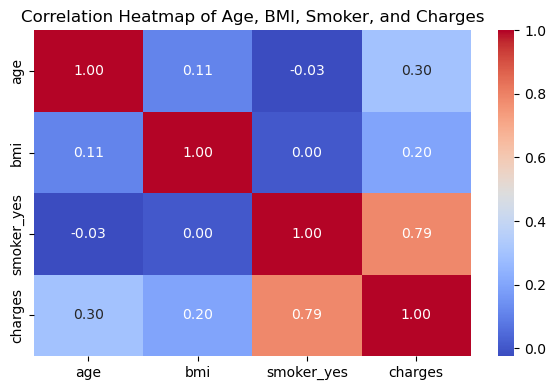

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
features = insurance_dum[['age', 'bmi', 'smoker_yes', 'charges']]

# Compute the correlation matrix
corr_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Age, BMI, Smoker, and Charges")
plt.tight_layout()
plt.show()


---
## Methodology

### Experimental Design:

1. **Dataset Preprocessing**:

   - Load the dataset and do some statistics and visualization processing to understand the dataset in depth.
   - Encode any non-numerical values.
   - ensures the dataset does not have any null values that may affect my results.
   - Extract features `['age', 'bmi', 'smoker_yes']` and labels `['charges']`.
   - Split my dataset: first into train (60%) and temp (40%).
   - Then split temp into validation (20%) and test (20%).
   - Add a bias column to each set.
   - Scale features.
   - change the label `['charges']` to be category `[0, 1]` 0 => `low charge`, 1 => `high charge`, except perceptron `[1, -1]` -1 => `low charge`, 1 => `high charge`.
   - Class distribution for all experiments: 2 classes the percentage of each class is `50.0 %`, so it is balance distribution.


2. **Software and library versions**
    - Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
    - NumPy version: 1.26.4
    - Pandas version: 2.2.3
    - Matplotlib version: 3.7.2
    - Seaborn version: 0.12.2
    - Scikit-learn version: 1.6.1
    - SciPy version: 1.11.1
   
3. **Configurations**

    - **Hardware:** CPU-based execution
    - **Platform:** Jupyter Notebook (local environment)
    - **Code repository:** GitHub (shared via link [ https://github.com/ZohoorAlmalkiUQU/Machine-_Learning_HWs/blob/main/446_ML_ClassificationAssignmen.ipynb])



#### Data Preprocessing stage:


In [39]:
import numpy as np

X = insurance_dum[['age', 'bmi', 'smoker_yes']].values.astype(float)
y = insurance_dum['charges'].values.reshape(-1, 1).astype(float)
# After i watch the 'Preprocessing for Machine Learning in Python' on DataCamp(not finish yet)
# i add this line to convert the 'charges' column to be a category(if charges >= median it will be 1, else 0)
y = insurance_dum['charges'].apply(lambda i: 1 if i >= np.median(y) else 0 )# first code i  convert the 'charges based on
# mean but i get a imbalance Class distribution so i do that base on the median


In [40]:
unique, counts = np.unique(y, return_counts=True)
class_dist = dict(zip(unique, counts))

print("Class distribution:", class_dist)
print("Percentage of class 1:", (class_dist[1] / len(y)) * 100, "%")

Class distribution: {0: 669, 1: 669}
Percentage of class 1: 50.0 %


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split: first into train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Then split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Add bias column to each set
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

X_train_b = add_bias(X_train)
X_val_b = add_bias(X_val)
X_test_b = add_bias(X_test)

# Optional: print shapes
print("Train:", X_train_b.shape, y_train.shape)
print("Validation:", X_val_b.shape, y_val.shape)
print("Test:", X_test_b.shape, y_test.shape)


Train: (802, 4) (802,)
Validation: (268, 4) (268,)
Test: (268, 4) (268,)


### Custom Logistic regression Model

In [43]:
# i worte alomost of this code except compute_accuracy,
# compute_error and compute_log_loss methods it is AI generation to help me to plot all results.
# plus GD i had a logical error and i solve it with AI.
# also first code in sigmoid func i do math.exp(-x) but AI , correct me to be vectorized with numpy np.exp(-x).
import numpy as np

def threshold(x):
    if x >= 0.5:
        return 'High'
    else:
        return 'low'
        
def compute_error(X, y, theta):
    preds = sigmoid(X @ theta)
    error = np.mean((preds >= 0.5) != y) 
    return error

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def GD(X, y, theta, alpha):
    pred = sigmoid(X @ theta)
    gradient = X.T @ (pred - y) / len(y)  
    theta = theta - alpha * gradient
    return theta

def compute_accuracy(X, y, theta):
    preds = sigmoid(X @ theta) >= 0.5
    return np.mean(preds == y)

def compute_log_loss(X, y, theta):
    preds = sigmoid(X @ theta)
    eps = 1e-15
    preds = np.clip(preds, eps, 1 - eps)
    return -np.mean(y * np.log(preds) + (1 - y) * np.log(1 - preds))


Epoch 0: Train Loss = 0.6775, Val Loss = 0.6775
Epoch 100: Train Loss = 0.3652, Val Loss = 0.3539
Epoch 200: Train Loss = 0.3277, Val Loss = 0.3143
Epoch 300: Train Loss = 0.3143, Val Loss = 0.3000
Epoch 400: Train Loss = 0.3079, Val Loss = 0.2930
Epoch 500: Train Loss = 0.3043, Val Loss = 0.2890
Epoch 600: Train Loss = 0.3021, Val Loss = 0.2866
Epoch 700: Train Loss = 0.3006, Val Loss = 0.2849
Epoch 800: Train Loss = 0.2996, Val Loss = 0.2838
Epoch 900: Train Loss = 0.2989, Val Loss = 0.2829


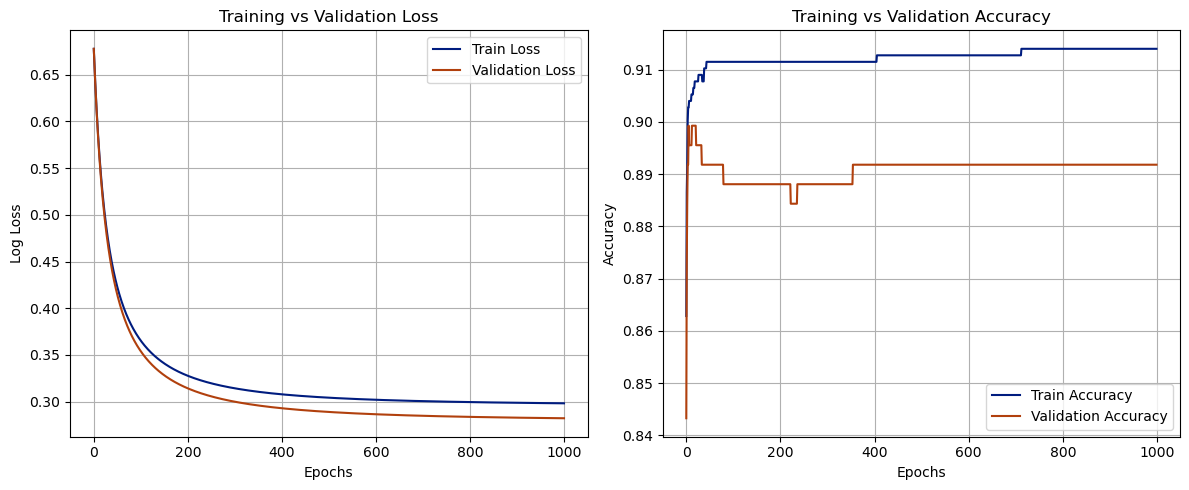

In [44]:
def train(X_train, y_train, X_val, y_val, alpha=0.1, epochs=1000):
    theta = np.random.randn(X_train.shape[1]) * 0.01  # Small random init
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    for epoch in range(epochs):
        theta = GD(X_train, y_train, theta, alpha)
        
        train_loss = compute_log_loss(X_train, y_train, theta)
        val_loss = compute_log_loss(X_val, y_val, theta)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        train_acc = compute_accuracy(X_train, y_train, theta)
        val_acc = compute_accuracy(X_val, y_val, theta)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        # Optional: Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
    
    return theta, train_losses, val_losses, train_accs, val_accs

theta_clr_no_ridge, train_losses, val_losses, train_accs, val_accs = train(
    X_train_b, y_train, X_val_b, y_val, alpha=0.1, epochs=1000
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import accuracy_score
y_pred_clr_no_ridge = sigmoid(X_test_b @ theta_clr_no_ridge) >= 0.5
clr_no_ridge_acc = accuracy_score(y_test, y_pred_clr_no_ridge)

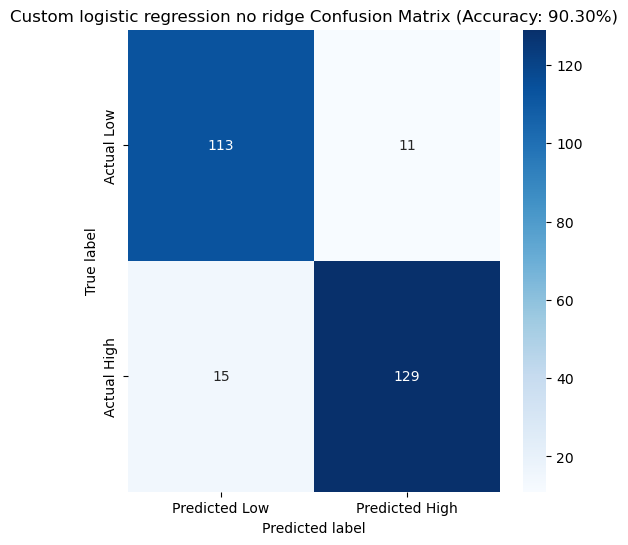

True Negatives: 113
False Positives: 11
False Negatives: 15
True Positives: 129
Accuracy: 0.9030
Precision: 0.9214
Recall/Sensitivity: 0.8958
Specificity: 0.9113


In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_clr_no_ridge = confusion_matrix(y_test, y_pred_clr_no_ridge)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_clr_no_ridge, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Custom logistic regression no ridge Confusion Matrix (Accuracy: {clr_no_ridge_acc*100:.2f}%)')
plt.show()

# Print classification metrics
tn, fp, fn, tp = cm_clr_no_ridge.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.4f}")
print(f"Precision: {tp / (tp + fp):.4f}")
print(f"Recall/Sensitivity: {tp / (tp + fn):.4f}")
print(f"Specificity: {tn / (tn + fp):.4f}")

Acc_clr = (tp + tn) / (tp + tn + fp + fn)

### Custom Logistic regression Model with regularization

Initial theta: [-0.00226128  0.00083617 -0.01501001 -0.00450815]
Epoch 0: Train Loss = 0.6817, Val Loss = 0.6809
Epoch 100: Train Loss = 0.3655, Val Loss = 0.3541
Epoch 200: Train Loss = 0.3279, Val Loss = 0.3144
Epoch 300: Train Loss = 0.3145, Val Loss = 0.3001
Epoch 400: Train Loss = 0.3080, Val Loss = 0.2932
Epoch 500: Train Loss = 0.3044, Val Loss = 0.2892
Epoch 600: Train Loss = 0.3022, Val Loss = 0.2867
Epoch 700: Train Loss = 0.3007, Val Loss = 0.2851
Epoch 800: Train Loss = 0.2997, Val Loss = 0.2839
Epoch 900: Train Loss = 0.2990, Val Loss = 0.2831
Trained theta: [0.38786917 2.11268356 0.17981352 2.818237  ]


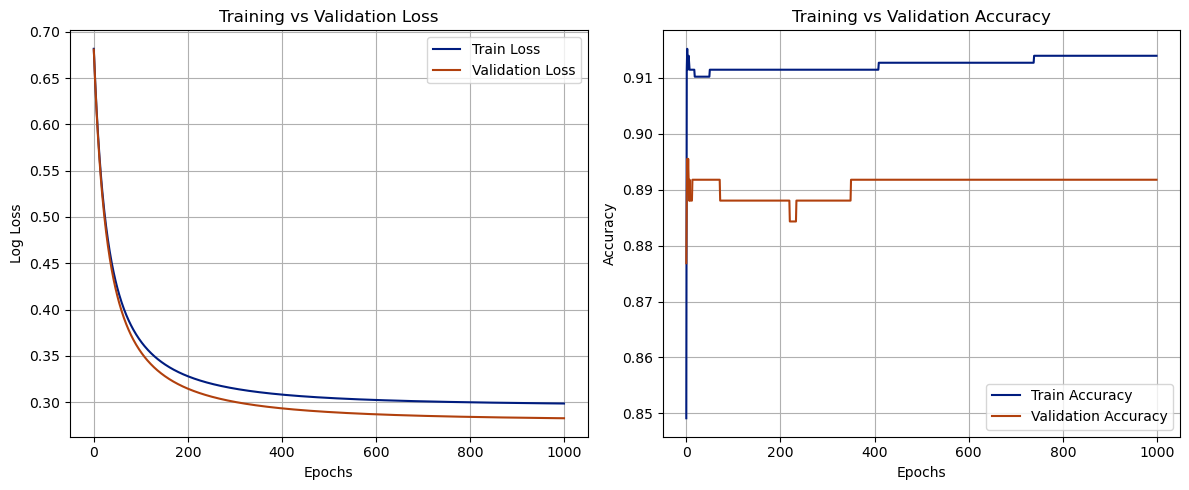

In [48]:
def GD_ridge(X, y, theta, alpha, lambda_=0.1):  
    pred = sigmoid(X @ theta)
    gradient = (X.T @ (pred - y)) / len(y)  
    
    reg_term = (lambda_ / len(y)) * theta
    reg_term[0] = 0  # no regularization for the bias term
    
    theta = theta - alpha * (gradient + reg_term) 
    return theta


def train_ridge(X_train, y_train, X_val, y_val, alpha=0.1, epochs=1000, lambda_=0.1):
    theta = np.random.randn(X_train.shape[1]) * 0.01  # Small random init
    print("Initial theta:", theta)
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    for epoch in range(epochs):
        theta = GD_ridge(X_train, y_train, theta, alpha)
        
        train_loss = compute_log_loss(X_train, y_train, theta)
        val_loss = compute_log_loss(X_val, y_val, theta)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        train_acc = compute_accuracy(X_train, y_train, theta)
        val_acc = compute_accuracy(X_val, y_val, theta)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        # Optional: Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")
    
    return theta, train_losses, val_losses, train_accs, val_accs

theta_clr_rdge, train_losses, val_losses, train_accs, val_accs = train_ridge(
    X_train_b, y_train, X_val_b, y_val, alpha=0.1, epochs=1000, lambda_=100
)
print("Trained theta:", theta_clr_rdge)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import accuracy_score

y_pred_clr_rdge = sigmoid(X_test_b @ theta_clr_rdge) >= 0.5

clr_rdge_acc = accuracy_score(y_test, y_pred_clr_rdge)

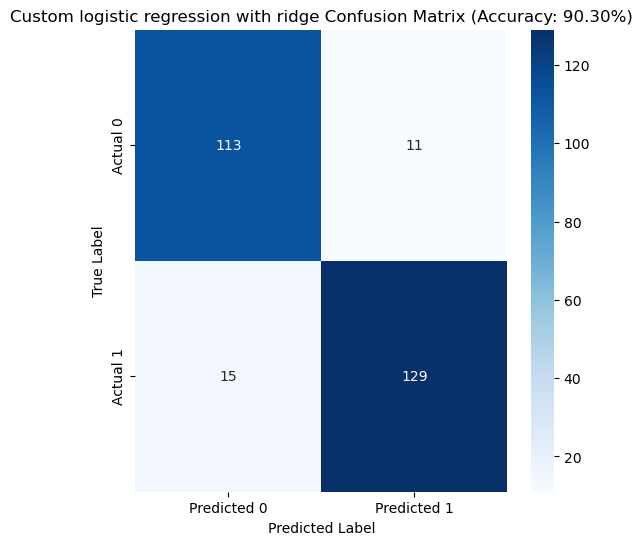


Classification Report:
Accuracy:  0.90%
Precision: 0.9214
Recall:    0.8958
F1 Score:  0.9085

True Negatives:  113
False Positives: 11
False Negatives: 15
True Positives:  129


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


# Compute confusion matrix
cm_clr_rdge = confusion_matrix(y_test, y_pred_clr_rdge)

# 5. Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_clr_rdge, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Custom logistic regression with ridge Confusion Matrix (Accuracy: {clr_rdge_acc*100:.2f}%)')
plt.show()

# 6. Print classification metrics
print('\nClassification Report:')
print(f"Accuracy:  {clr_rdge_acc:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_clr_rdge):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_clr_rdge):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_clr_rdge):.4f}")

# 7. Optional: Show raw confusion matrix values
tn, fp, fn, tp = cm_clr_rdge.ravel()
print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")

### Sklearn Logistic Regression Model:

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

sl_lr = LogisticRegression()
sl_lr.fit(X_train_b, y_train)
acc_sl_lr = accuracy_score(y_test, sl_lr.predict(X_test_b))

print('Accuracy Sklearn Logistic Regression model: ', acc_sl_lr)

Accuracy Sklearn Logistic Regression model:  0.9029850746268657


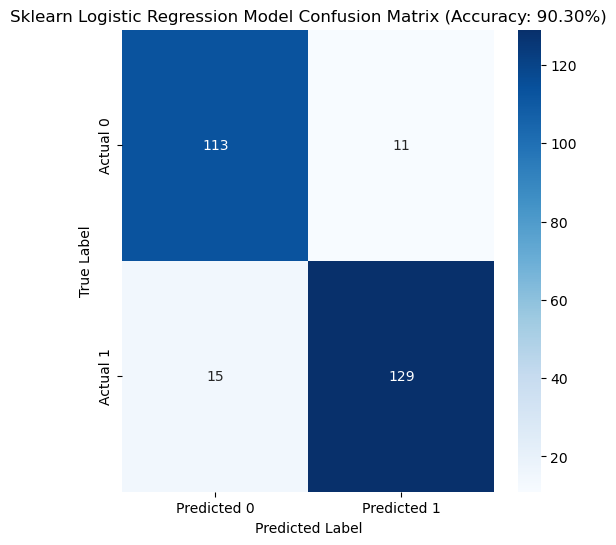


Classification Report:
Accuracy:  0.90%
Precision: 0.9214
Recall:    0.8958
F1 Score:  0.9085

True Negatives:  113
False Positives: 11
False Negatives: 15
True Positives:  129


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_sl_lr =  sl_lr.predict(X_test_b)
cm_sl_lr = confusion_matrix(y_test, sl_lr.predict(X_test_b))

# 5. Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_sl_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Sklearn Logistic Regression Model Confusion Matrix (Accuracy: {acc_sl_lr*100:.2f}%)')
plt.show()

# 6. Print classification metrics
print('\nClassification Report:')
print(f"Accuracy:  {acc_sl_lr:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_sl_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_sl_lr):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_sl_lr):.4f}")

# 7. Optional: Show raw confusion matrix values
tn, fp, fn, tp = cm_sl_lr.ravel()
print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")


### Custom Perceptron Model:

In [55]:
# i add this to change the target 'charges' to [1,-1]
y_p_train = y_train.apply(lambda i: 1 if i >= np.median(y) else -1 )
y_p_test = y_test.apply(lambda i: 1 if i >= np.median(y) else -1 )

unique, counts = np.unique(y_p_train, return_counts=True)
class_dist = dict(zip(unique, counts))

print("Class distribution:", class_dist)
print("Percentage of class 1:", (class_dist[1] / len(y_p_train)) * 100, "%")

Class distribution: {-1: 397, 1: 405}
Percentage of class 1: 50.49875311720699 %


In [56]:
import numpy as np
def perceptron_predict(X, theta):
    return X @ theta

def threshold(y):
    return [1 if i >= 0 else -1 for i in y]

In [57]:
import numpy as np
# in this code AI correct me to write y.iloc[i] rather than y[i], y[i] has KeyError: 2,
# i try to understand why i get this KeyError: 2 
# and that becaouse after i spilt my dataset the index of y_train and y_test is not reset 
def perceptron_train(X, y, epochs=1000, alpha=0.1):
    theta = np.random.randn(X.shape[1]) * 0.01 # random tethas, +tive and -tive thetas

    for epoch in range(epochs):
        y_pred = perceptron_predict(X, theta)
        for i in range(len(y)):
            x_i = X[i]
            y_true = y.iloc[i]
            y_pred_i = y_pred[i]
            if y_pred_i * y_true < 0 : # if the sign is different i will update the thetas
                theta = theta + alpha * y_true * x_i

    return theta


In [58]:
theta_p = perceptron_train(X_train_b, y_p_train, epochs=1000, alpha=0.1)
from sklearn.metrics import accuracy_score
y_pred_p = perceptron_predict(X_test_b, theta_p)
y_pred_p = threshold(y_pred_p)
p_acc = accuracy_score(y_p_test, y_pred_p)
print("Perceptron Accuracy:", p_acc )


Perceptron Accuracy: 0.9029850746268657


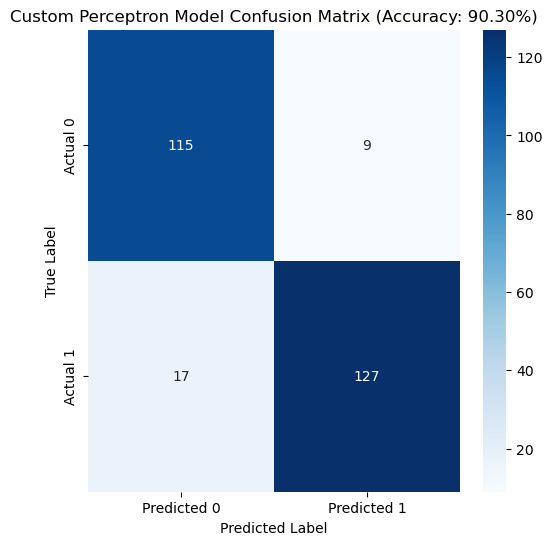


Classification Report:
Accuracy:  0.90%
Precision: 0.9338
Recall:    0.8819
F1 Score:  0.9071

True Negatives:  115
False Positives: 9
False Negatives: 17
True Positives:  127


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

p_cm = confusion_matrix(y_p_test, y_pred_p)

# 5. Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(p_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Custom Perceptron Model Confusion Matrix (Accuracy: {p_acc*100:.2f}%)')
plt.show()

# 6. Print classification metrics
print('\nClassification Report:')
print(f"Accuracy:  {p_acc:.2f}%")
print(f"Precision: {precision_score(y_p_test, y_pred_p):.4f}")
print(f"Recall:    {recall_score(y_p_test, y_pred_p):.4f}")
print(f"F1 Score:  {f1_score(y_p_test, y_pred_p):.4f}")

# 7. Optional: Show raw confusion matrix values
tn, fp, fn, tp = p_cm.ravel()
print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")


### Custom Naïve Bayes model

In [61]:
import numpy as np

def train_naive_bayes(X, y):
    classes = np.unique(y)
    model = {}
    
    model['class_counts'] = {c: np.sum(y == c) for c in classes}
    total_samples = len(y)
    
    model['feature_stats'] = {}
    for c in classes:
        X_c = X[y == c]  
        model['feature_stats'][c] = {
            'mean': np.mean(X_c, axis=0),
            'std': np.std(X_c, axis=0)
        }
    
    return model

def predict_naive_bayes(model, X):
    """Make predictions using the trained model"""
    predictions = []
    classes = list(model['class_counts'].keys())
    
    for x in X:  
        best_class = None
        best_score = -np.inf
        
        for c in classes: 
            class_prob = model['class_counts'][c] / sum(model['class_counts'].values())
            likelihood = 1.0
            
            for i, value in enumerate(x):
                mean = model['feature_stats'][c]['mean'][i]
                std = model['feature_stats'][c]['std'][i]
                
                exponent = -((value - mean) ** 2) / (2 * std ** 2)
                feature_prob = np.exp(exponent) / (np.sqrt(2 * np.pi) * std)
                likelihood *= feature_prob
            
            if class_prob * likelihood > best_score:
                best_score = class_prob * likelihood
                best_class = c
        
        predictions.append(best_class)
    
    return np.array(predictions)

model = train_naive_bayes(X_train, y_train)

np_pred = predict_naive_bayes(model, X_test)


In [62]:
from sklearn.metrics import accuracy_score
nb_acc = accuracy_score(y_test, np_pred)
print("Naïve Bayes model Accuracy:", nb_acc )

Naïve Bayes model Accuracy: 0.6865671641791045


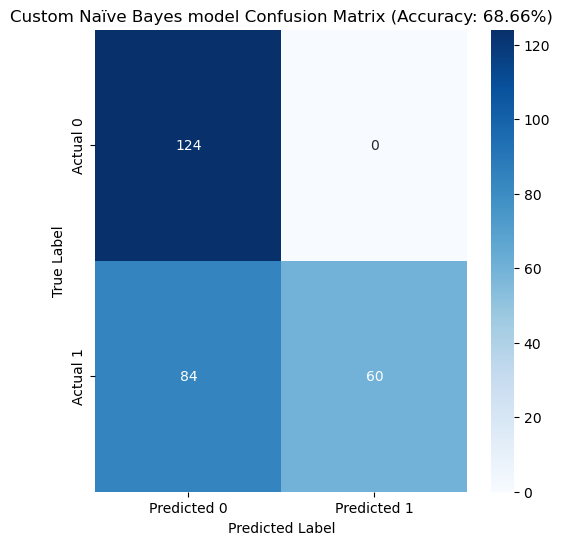


Classification Report:
Accuracy:  0.69%
Precision: 1.0000
Recall:    0.4167
F1 Score:  0.5882

True Negatives:  124
False Positives: 0
False Negatives: 84
True Positives:  60


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

nb_cm = confusion_matrix(y_test, np_pred)

# 5. Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Custom Naïve Bayes model Confusion Matrix (Accuracy: {nb_acc*100:.2f}%)')
plt.show()

# 6. Print classification metrics
print('\nClassification Report:')
print(f"Accuracy:  {nb_acc:.2f}%")
print(f"Precision: {precision_score(y_test, np_pred):.4f}")
print(f"Recall:    {recall_score(y_test, np_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, np_pred):.4f}")

# 7. Optional: Show raw confusion matrix values
tn, fp, fn, tp = nb_cm.ravel()
print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")


### Sklearn SVM Model: 

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train_b, y_train)

svm_pred = svm.predict(X_test_b)

svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc )

SVM Accuracy: 0.9029850746268657


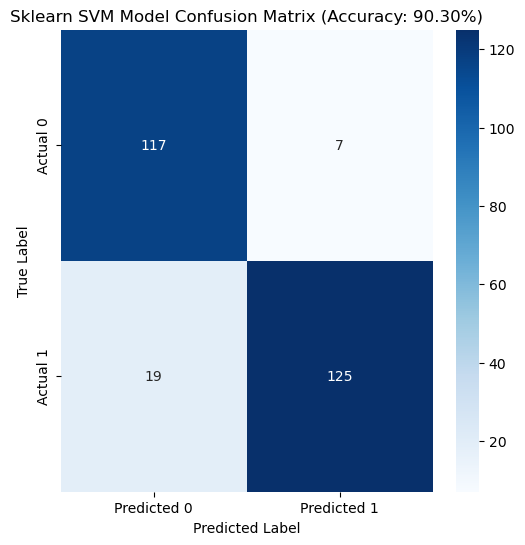


Classification Report:
Accuracy:  0.90%
Precision: 1.0000
Recall:    0.4167
F1 Score:  0.5882

True Negatives:  117
False Positives: 7
False Negatives: 19
True Positives:  125


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

svm_cm = confusion_matrix(y_test, svm_pred)

# 5. Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Sklearn SVM Model Confusion Matrix (Accuracy: {svm_acc*100:.2f}%)')
plt.show()

# 6. Print classification metrics
print('\nClassification Report:')
print(f"Accuracy:  {svm_acc:.2f}%")
print(f"Precision: {precision_score(y_test, np_pred):.4f}")
print(f"Recall:    {recall_score(y_test, np_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, np_pred):.4f}")

# 7. Optional: Show raw confusion matrix values
tn, fp, fn, tp = svm_cm.ravel()
print(f"\nTrue Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")


## Results and Discussion:
- **Custom Logistic Regression (No Regularization): 90.30%**
  - The custom implementation of logistic regression without any regularization performed very well, achieving a high accuracy. This suggests that the selected features (age, bmi, smoker_yes) are informative enough for binary classification based on the median charges.

- **Custom Logistic Regression (With Regularization `L2`): 90.30%**
  - Adding L2 regularization with a high regularization strength (λ = 100) did not change the test accuracy, my explanation for that:
    - The model is likely already converging to a global or good local minimum without overfitting, thanks to the clean and linearly separable structure of the selected features (`age`, `bmi`, `smoker_yes`).
- **Sklearn Logistic Regression        : 90.30%**

  - The performance of the scikit-learn version of logistic regression matches the custom implementations exactly. This validates the correctness of the custom implementation and shows that basic logistic regression is well-suited for this classification task.


- **Custom Perceptron                  : 90.30%**

  - The perceptron model matched the performance of logistic regression, achieving 90.30% accuracy. This shows that the data is linearly separable enough for even a simple, non-probabilistic model like the perceptron to perform well. Despite its simplicity and lack of regularization, it proved effective, making it a viable option for linear classification tasks with clean data.

- **Custom Naive Bayes                 : 68.66%**

  - The Naive Bayes model performed noticeably worse than the other classifiers, achieving only 68.66% accuracy. Naive Bayes assumes conditional independence among features given the class label. While this assumption is often violated in real-world data, the heatmap shows that the correlation between age and bmi is low (0.11), suggesting weak linear dependence.


- **Sklearn SVM Classifier             : 90.30%**

  - Support Vector Machine (SVM) using scikit-learn achieved the same accuracy as logistic regression. This reinforces the idea that the decision boundary for this classification task is well captured by linear classifiers. If a non-linear kernel were used, SVM might provide a different trade-off between bias and variance.
 
#### Overall Insights
- Best performers: Logistic Regression (custom and sklearn) and SVM — all achieved 90.30% accuracy.
- Slightly lower: The Perceptron model at 87.69%, which is still strong given its simplicity.
- Poorest performer: Naive Bayes at 68.66%, likely due to its assumptions not aligning well with the dataset.

These results suggest that for binary classification based on `charges`, linear models with proper feature selection and scaling perform very well.

In [68]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import sklearn
import scipy

print("Python version:", sys.version)
print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("SciPy version:", scipy.__version__)


Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.26.4
Pandas version: 2.2.3
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
Scikit-learn version: 1.6.1
SciPy version: 1.11.1


### Results Summary

In [70]:
from sklearn.metrics import accuracy_score

model_accuracies = {
    "Custom Logistic Regression (No ridge)": clr_no_ridge_acc,
    "Custom Logistic Regression (With ridge)": clr_rdge_acc ,
    "Sklearn Logistic Regression": acc_sl_lr,
    "Custom Perceptron": p_acc,
    "Custom Naive Bayes": nb_acc,
    "Sklearn SVM Classifier": svm_acc 
}

# Print model accuracies
print("Model Accuracy Summary:\n")
for model_name, acc in model_accuracies.items():
    print(f"{model_name:<35}: {acc * 100:.2f}%")


Model Accuracy Summary:

Custom Logistic Regression (No ridge): 90.30%
Custom Logistic Regression (With ridge): 90.30%
Sklearn Logistic Regression        : 90.30%
Custom Perceptron                  : 90.30%
Custom Naive Bayes                 : 68.66%
Sklearn SVM Classifier             : 90.30%


---
## Conclusion
In this assignment, I compared several models for predicting high vs. low medical charges using a few key features. Logistic Regression (with and without regularization), Perceptron, and SVM all achieved the highest accuracy (90.30%), indicating that the data is linearly separable. In contrast, Naive Bayes significantly underperformed (68.66%), likely due to its simplifying assumptions about feature independence.

Overall, linear models performed well, and regularization had minimal effect, suggesting that overfitting was not a major concern.

Considering simplicity, interpretability, and performance, I believe the best model to use is Logistic Regression without regularization.

Despite the perceptron is algorithmically simpler but Logistic Regression is more robust to noise, so I prefer the Logistic Regression over all other models.

## References:
- [1] https://www.kaggle.com/code/narminhumbatli/medical-cost-personal-datasets-data-visualization
- [2] https://www.kaggle.com/code/mragpavank/medical-cost-personal-datasets/notebook
- [3] https://www.kaggle.com/datasets/mirichoi0218/insurance